# Titanic survived Project

By Rushda Shabbir

Batch - DS2405

# Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Attribute Information

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# commemnts
There are three different types of data (int64, float, and object) present in the dataset.

PassengerId, Survived, Pclass, SibSP, Parch: int64
Age, Fare: float64
Name, Sex, Ticket, Cabin, Embarket: object->String



In [8]:
# Reviewing the missing values in Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# checking the null values
missing_val = df.isnull().sum().to_frame()

# Calculate the % of the null values
missing_val['% of missing'] = round(df.isnull().sum()/df.shape[0]*100, 2)

missing_val

,0,% of missing
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


# comments
The features Age, Cabin and Embarked have null values. Here we can see clearly the percentage of missing values in each feature.

1. Age column has a 19% of null values, so we will impute using the median
2. Cabin colum has a 77% of missing values. We are going to look deeper in order to determine if this feature has an impact on the target. Dropping this feature from the dataset could be a way to handle these missing values.
3. Embarked column: Being only 2/891 records, we are going to do a further analysis of these two or drop them.



In [10]:
# Reviewing the missing values in Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Setting S as Embarked
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

Both passengers are female, first class, and have the same ticket number 113572. Therefore, the most probably is both have embarked at the same port. Searching for these passengers I found out the had embarked from S(Southampton) so i set here S.

In [12]:
df[df['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


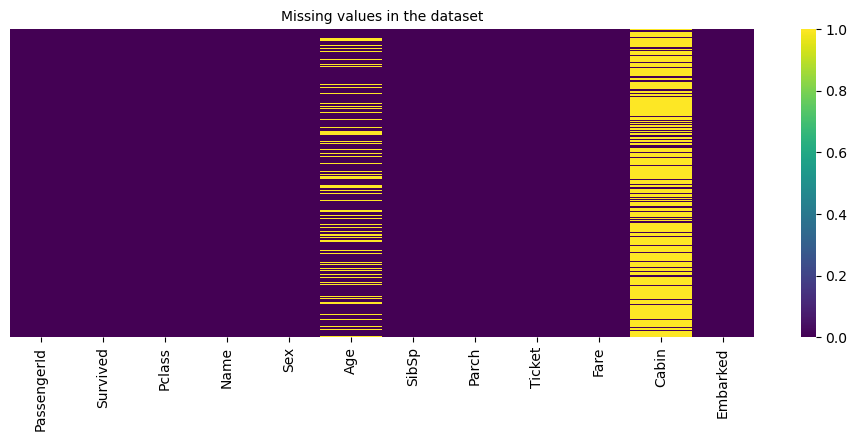

In [13]:
# Let's visualize it using heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False ,cmap='viridis')
plt.title('Missing values in the dataset', fontsize=10);

# comments
Here in the plot, we can appreciate that the feature "Cabin" has a lot of missing values, and then the "Age" feature follows.

In [14]:
# Finding how many null values are in each Pclass and Sex group
df.loc[df['Age'].isnull(),:].groupby(['Pclass','Sex']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female            9         9     9    0      9      9       9     9   
       male             21        21    21    0     21     21      21    21   
2      female            2         2     2    0      2      2       2     2   
       male              9         9     9    0      9      9       9     9   
3      female           42        42    42    0     42     42      42    42   
       male             94        94    94    0     94     94      94    94   

               Cabin  Embarked  
Pclass Sex                      
1      female      5         9  
       male       11        21  
2      female      1         2  
       male        0         9  
3      female      1        42  
       male        1        94

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

age_corr = corr_matrix['Age'].drop('Age')
age_corr_df = age_corr.reset_index()
age_corr_df.columns = ['Feature', 'Correlation with Age']

In [16]:
print(age_corr_df)

       Feature  Correlation with Age
0  PassengerId              0.036847
1     Survived             -0.077221
2       Pclass             -0.369226
3        SibSp             -0.308247
4        Parch             -0.189119
5         Fare              0.096067


In [17]:
df['Age'].isnull().sum()

177

In [18]:
df[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [19]:
def input_age(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
df['Age']=df[['Age','Pclass']].apply(input_age,axis =1)

In [21]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

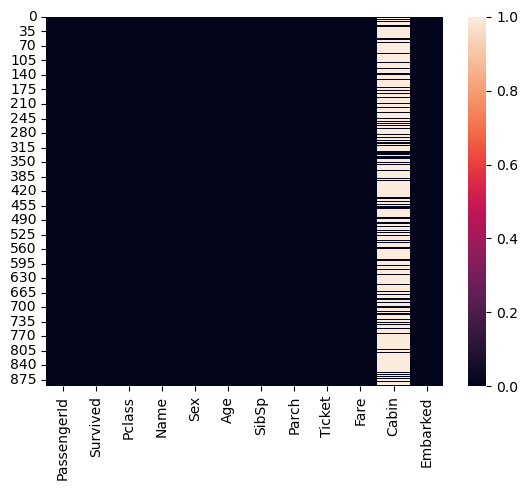

In [22]:
sns.heatmap(df.isnull())

 cabins colums has alots of null values so we can drop it for further analysis

In [23]:
# now going to drop this cabin column

df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

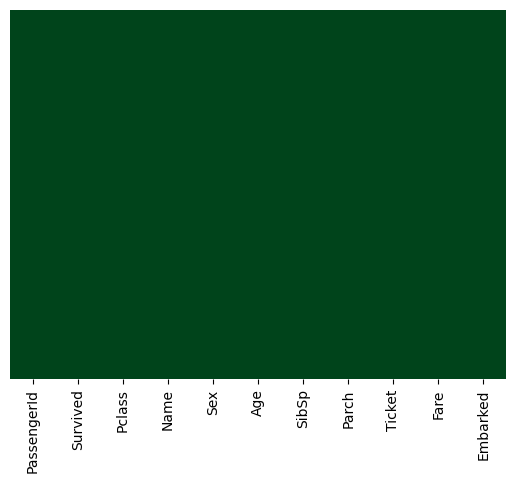

In [24]:
 sns.heatmap(df.isnull(),yticklabels=False,cmap='Greens_r',cbar=False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# now there is no null values in dataset

# Features Analysis

In [26]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame()
info_df['type'] = df.dtypes.values
info_df

,0,type
PassengerId,891,int64
Survived,2,int64
Pclass,3,int64
Name,891,object
Sex,2,object
Age,88,float64
SibSp,7,int64
Parch,7,int64
Ticket,681,object
Fare,248,float64


# commenmts
About the number of unique values:

1. PassengerId column has the same unique values as the dataset rows, this column only serves to identify the passenger but 
   doesn't influence the target variable. There for we can drop it.

2. Survived column, that is the target, has 2 unique values. Two values from 891 records represent a significant 
   difference, so we can treat this problem as a classification problem.
3. Pclass column (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature 
   which has 3 unique values (1, 2 or 3), that we can infer: 1 = Upper Class 2 = Middle Class 3 = Lower Class
4. sex column is a category variable with two unique values
5. Age column is represented by a float and has 88 unique values.
6. SibSp and Parch are represented by an integer and have 7 unique values each one.
7. Ticket is represented by an object(string) with 681 posible values.
8. Cabin has 248 unique values.
9. Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S).

Next, we will remove the columns: PassengerId, Name. The Cabin column will be dropped due to its high percentage of missing values.

In [27]:
# Dropping the column PassengerId and place the target at the end
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
df.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
24,3,female,8.0,3,1,21.0750,S,0
25,3,female,38.0,1,5,31.3875,S,1
117,2,male,29.0,1,0,21.0000,S,0
322,2,female,30.0,0,0,12.3500,Q,1
612,3,female,24.0,1,0,15.5000,Q,1
535,2,female,7.0,0,2,26.2500,S,1
172,3,female,1.0,1,1,11.1333,S,1
492,1,male,55.0,0,0,30.5000,S,0
856,1,female,45.0,1,1,164.8667,S,1
170,1,male,61.0,0,0,33.5000,S,0


In [28]:
# Checking the new shape of the dataset.
df.shape

(891, 8)

After dropping some columns the data have 7 features and 1 target variable.

# Summary statistics of the numerical and non-numerical variables

In [29]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.066409,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.244532,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [30]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# commemnts

1. The only features which can be considered as numerical and need to analysis as numerical features are Age and Fare. The 
   other features are categorical despite being represented by a numerical value.
2. the Age feature has a mean of 29.11 which means the average age of the passengers is 29 years. Since the standard 
   deviation is 13.3 .  
  
3. The Fare feature has a mean of 32.20 and a std of 49.69. The minimum value is 0, and the maximum is 512.32 very far from    the 75% percentile which is 31. we can observe 
   there is a huge difference between 75% and max hence there are outliers present in the data.                
4. The mean value is greater than the median(50%) in Age and Fare columns which means the data is skewed to right.
5. The Sex feature has two unique values as we see before, and the most common value is male.
6. The Embarket feature has three unique values, and the most common value is S.



# Data Visualization

Univariate Analysis

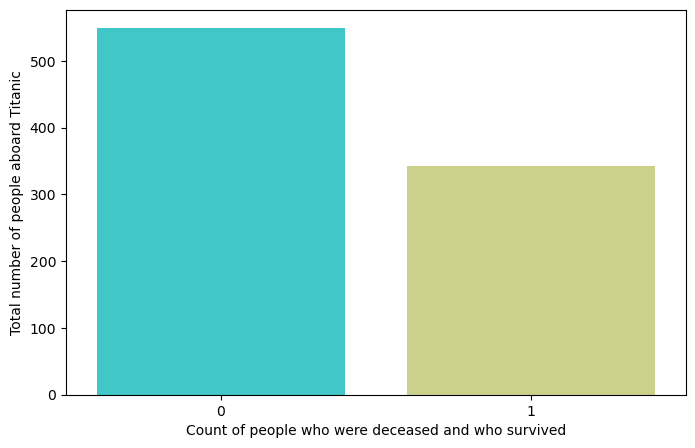

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Survived', data = df, palette="rainbow")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the above count plot 0 depicts the number of people who drowned when the Titanic sank and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

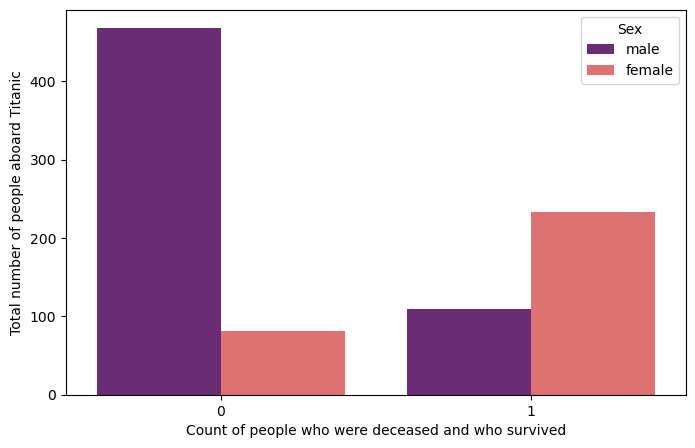

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Survived', data = df, hue='Sex' , palette="magma")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Adding the sex column shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children.

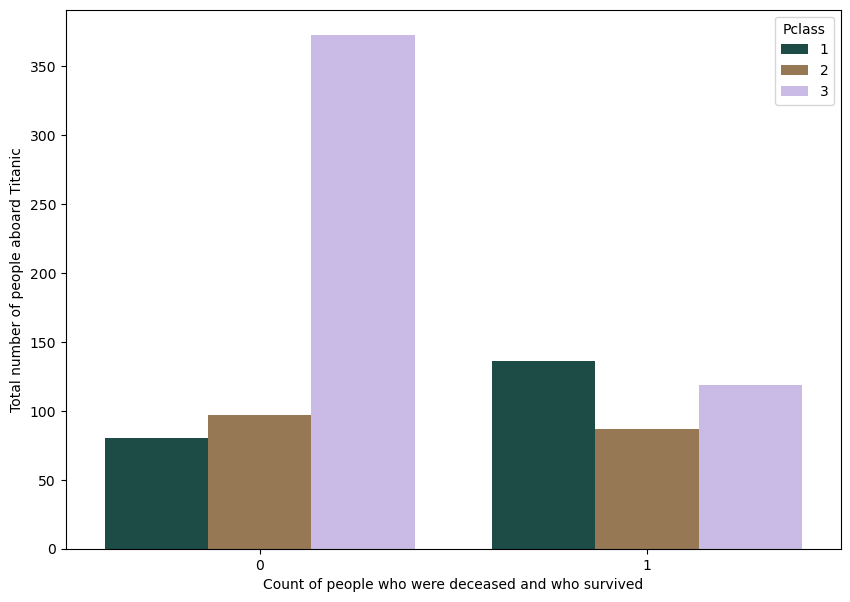

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Pclass', palette="cubehelix")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

we can see that the highest number of deaths happened for class 3 people because again the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 folks were being rescued they ran out of life boats and time as well since the Titanic had almost sank into the ocean.

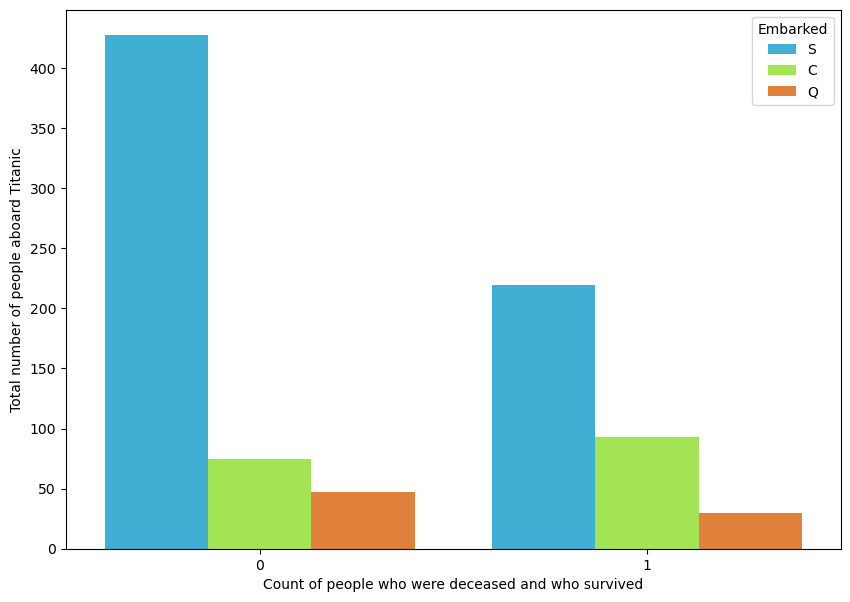

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Embarked', palette="turbo")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

C:\Users\ww\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


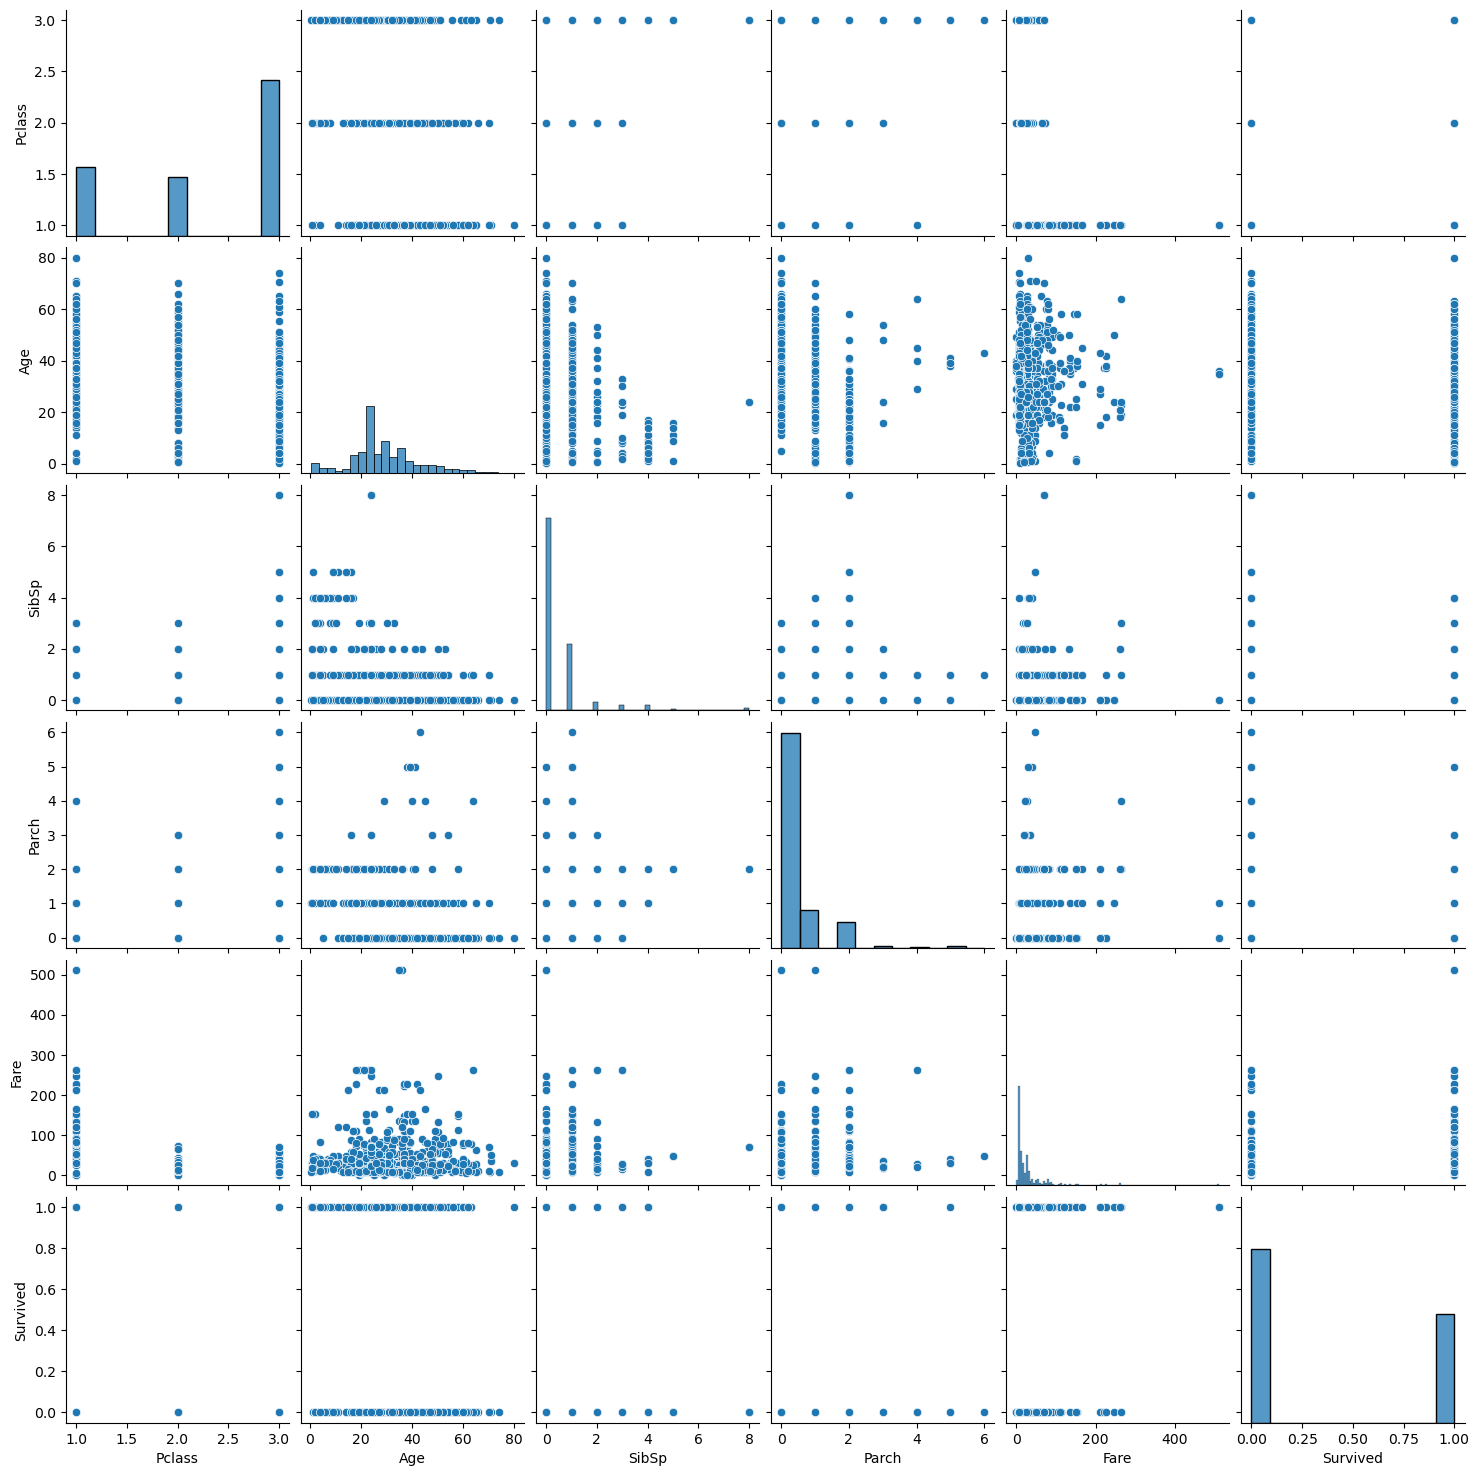

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

Survived
0    549
1    342
Name: count, dtype: int64


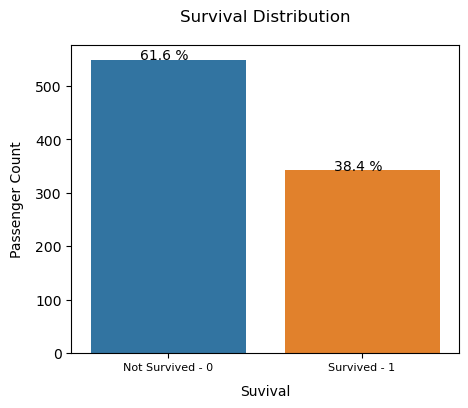

In [37]:
# Visualize the number of survivors in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Survived', data=df)
show_percentage(ax, len(df))

plt.xlabel('Suvival', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Not Survived - 0', 'Survived - 1'], size=8)
plt.title('Survival Distribution', size=12, y=1.05)

# Summarize the data
print(df['Survived'].value_counts())

Out of 891 passengers, only 342 (38.4%) of the total dataset survived. The target variable is not balanced.

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


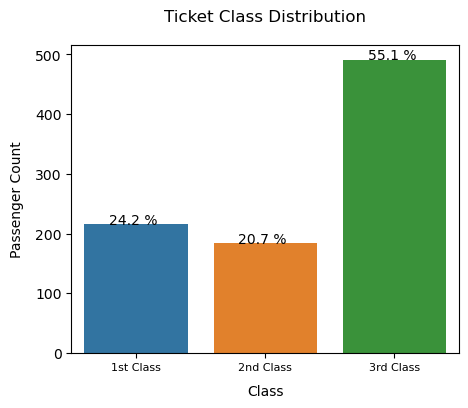

In [38]:
# Visualize the Ticket Class distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Pclass', data=df)
show_percentage(ax, len(df))

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Ticket Class Distribution', size=12, y=1.05)

# Summarize the data
print(df['Pclass'].value_counts())

More than half of the passengers were in third class (55.1%), the rest were distributed 24.2% in first class and 20.7% in second class.

# SibSP feature - No. of siblings / spouses aboard

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


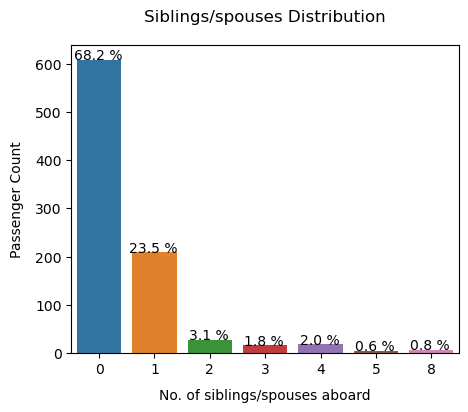

In [39]:
# Visualize the SibSp distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='SibSp', data=df)
show_percentage(ax, len(df))

plt.xlabel('No. of siblings/spouses aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Siblings/spouses Distribution', size=12, y=1.05)

# Summarize the data
print(df['SibSp'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


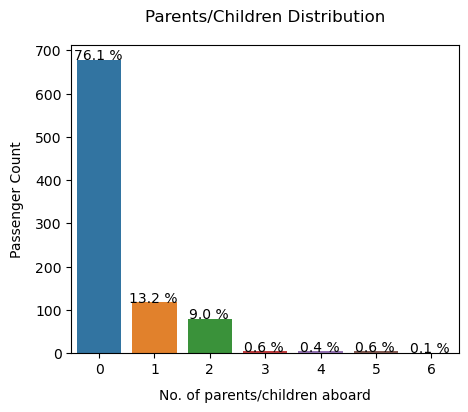

In [40]:
# Visualize the Parch distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Parch', data=df)
show_percentage(ax, len(df))

plt.xlabel('No. of parents/children aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Parents/Children Distribution', size=12, y=1.05)

# Summarize the data
print(df['Parch'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


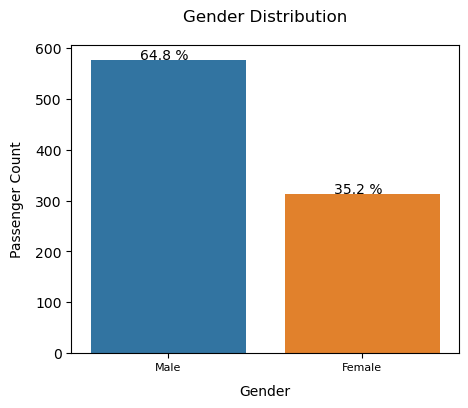

In [41]:
# Visualize the Gender distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Sex', data=df)
show_percentage(ax, len(df))

plt.xlabel('Gender', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Male', 'Female'], size=8)
plt.title('Gender Distribution', size=12, y=1.05)

# Summarize the data
print(df['Sex'].value_counts())

64.8% of the passengers were men and 35.2% were women.

Text(0.5, 1.05, 'Age Box Plot')

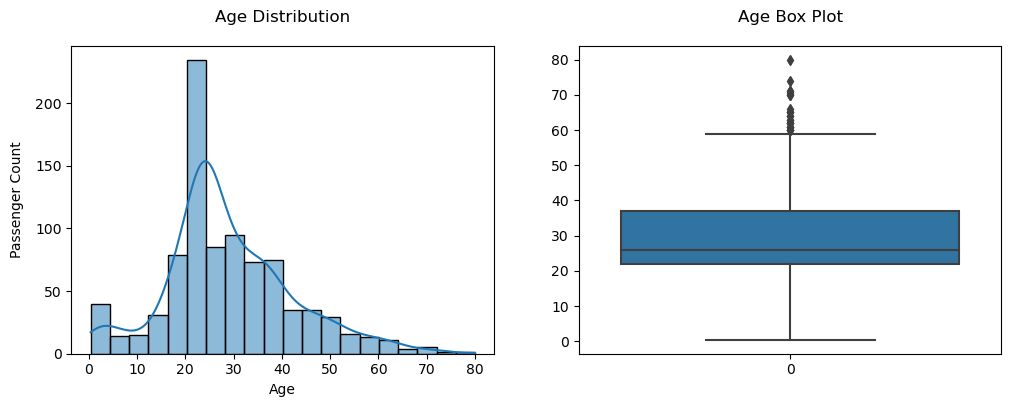

In [42]:
#Visualize Age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Age'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Age'], ax=axes[1])

axes[0].set_title('Age Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Age Box Plot', size=12, y=1.05)

In [43]:
# Summarize the data
print(df['Age'].describe())

count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


Most of the passengers were between 20 and 28 years old. This column present outliers.

# Bivariate Analysis

Pclass feature

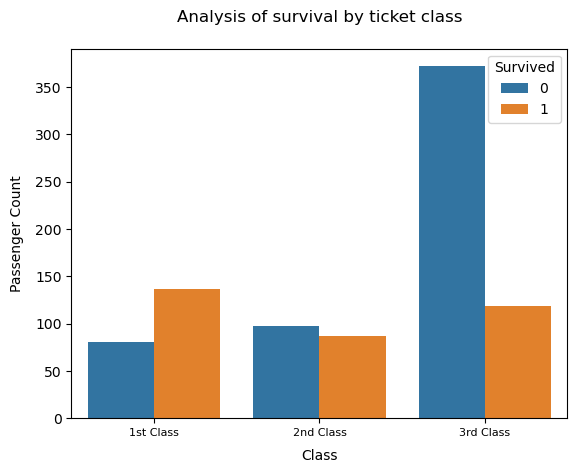

In [44]:
# Comparing Pclass on the basis of Survival
ax = sns.countplot(x = "Pclass", hue = "Survived", data = df)

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Analysis of survival by ticket class', size=12, y=1.05)

plt.show()

# comments
1. In the above plot, we can see most of the passengers who were traveling in 3rd class did not survive in contrast with the other class passengers.

2. In the group of passengers who were traveling in 2nd class, there was an almost equal number of people who died and survived.

3. Passengers of 1st class, more survive.

4. We can say that a passenger who was traveling in the 3rd has a higher chance of dying. And those who were traveling in 1st class had a higher chance of surviving.



C:\Users\ww\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

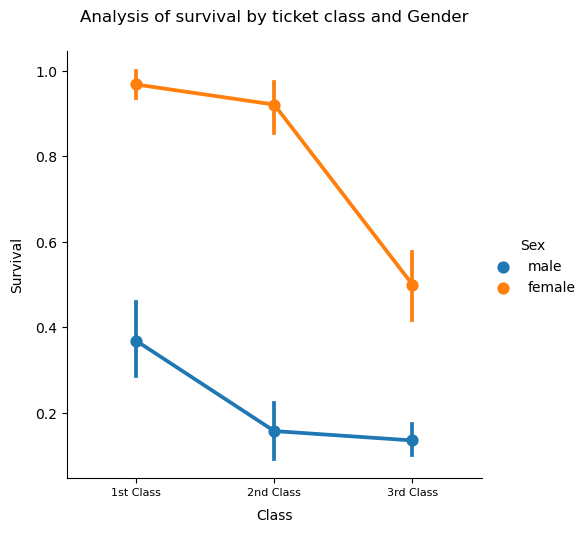

In [45]:
# Plotting with sns.catplot
plt.figure(figsize=(4, 4))
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Survival', size=10, labelpad=8)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Analysis of survival by ticket class and Gender', size=12, y=1.05)

plt.show()

# commemnts
1. We can see that women in 1st and 2nd class have a high survival rate of more than 80%. Although the survival rate of 3rd class women is lower, it is still higher than the survival rate of men.
2. For men, there are still more survivors in 1st class compared to 2nd and 3rd class



In [46]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

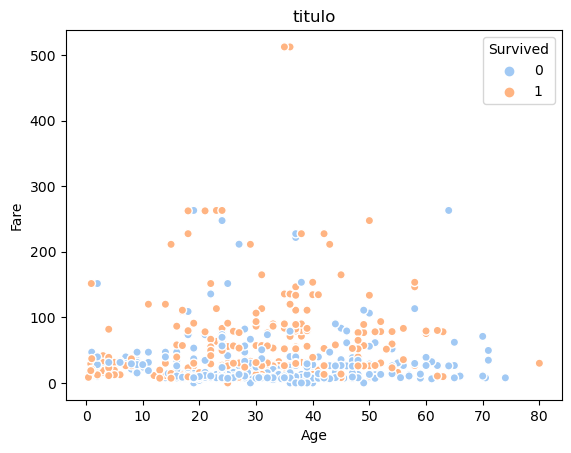

In [47]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, linewidth=1, palette='pastel')
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("titulo")
plt.show()

In [48]:
# Copy the DataFrame
df_encod = df.copy()

In [49]:

# One-Hot Encoding - columns 'Sex' and 'Embarked'
df_encod = pd.get_dummies(df_encod, columns=['Sex', 'Embarked'])

# Convert True/False to 0/1
df_encod = df_encod.astype(int)

# Display the encoded DataFrame
print(df_encod)

     Pclass  Age  SibSp  Parch  Fare  Survived  Sex_female  Sex_male  \
0         3   22      1      0     7         0           0         1   
1         1   38      1      0    71         1           1         0   
2         3   26      0      0     7         1           1         0   
3         1   35      1      0    53         1           1         0   
4         3   35      0      0     8         0           0         1   
..      ...  ...    ...    ...   ...       ...         ...       ...   
886       2   27      0      0    13         0           0         1   
887       1   19      0      0    30         1           1         0   
888       3   24      1      2    23         0           1         0   
889       1   26      0      0    30         1           0         1   
890       3   32      0      0     7         0           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2        

In [50]:
df_encod

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,0,1,0,0,1
1,1,38,1,0,71,1,1,0,1,0,0
2,3,26,0,0,7,1,1,0,0,0,1
3,1,35,1,0,53,1,1,0,0,0,1
4,3,35,0,0,8,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,1,0,0,1
887,1,19,0,0,30,1,1,0,0,0,1
888,3,24,1,2,23,0,1,0,0,0,1
889,1,26,0,0,30,1,0,1,1,0,0


In [51]:
# Arrange columns in the desired order
columns_order = ['Age', 'Fare', 'Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']
df_encoded = df_encod[columns_order]

In [52]:
# Display the DataFrame
print("DataFrame after arranging columns:")
print(df_encoded.head())

DataFrame after arranging columns:
   Age  Fare  Pclass  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0   22     7       3           0         1           0           0   
1   38    71       1           1         0           1           0   
2   26     7       3           1         0           0           0   
3   35    53       1           1         0           0           0   
4   35     8       3           0         1           0           0   

   Embarked_S  Survived  
0           1         0  
1           0         1  
2           1         1  
3           1         1  
4           1         0  


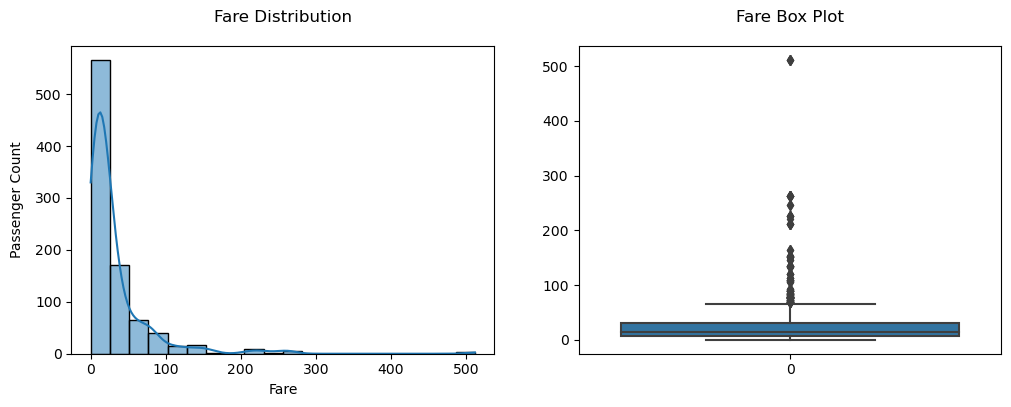

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [53]:
# Visualize Fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_encoded['Fare'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df_encoded['Fare'], ax=axes[1])

axes[0].set_title('Fare Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Fare Box Plot', size=12, y=1.05)

plt.show()

# Summarize the data
print(df['Fare'].describe())

# Checking for skewness

In [54]:
df_encod.skew()

Pclass       -0.630548
Age           0.542074
SibSp         3.695352
Parch         2.749117
Fare          4.786430
Survived      0.478523
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [55]:
df_encod['Fare'] = np.cbrt(df_encod['Fare'])
     

C:\Users\ww\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ww\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


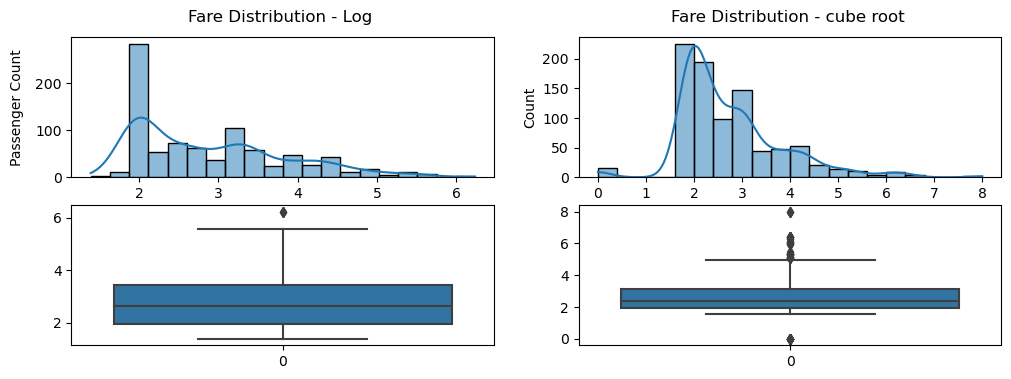

In [56]:
# Removing skewness
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

sns.histplot(np.log(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,0])
sns.boxplot(np.log(df_encoded['Fare']), ax=axes[1,0])

sns.histplot(np.cbrt(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,1])
sns.boxplot(np.cbrt(df_encoded['Fare']), ax=axes[1,1])

axes[0,0].set_title('Fare Distribution - Log ', size=12, y=1.05)
axes[0,1].set_title('Fare Distribution - cube root ', size=12, y=1.05)

axes[0,0].set_ylabel('Passenger Count', size=10, labelpad=8)

plt.show()

In [57]:
df_encod.skew()

Pclass       -0.630548
Age           0.542074
SibSp         3.695352
Parch         2.749117
Fare          1.224234
Survived      0.478523
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [58]:
from scipy.stats import zscore

z = np.abs(zscore(df_encod))
z

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,0.532310,0.432793,0.473674,0.764364,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
1,1.566107,0.675683,0.432793,0.473674,1.292689,1.266990,1.355574,1.355574,2.074505,0.307562,1.623803
2,0.827377,0.230312,0.474545,0.473674,0.764364,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
3,1.566107,0.449184,0.432793,0.473674,0.937643,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
4,0.827377,0.449184,0.474545,0.473674,0.683972,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
886,0.369365,0.154812,0.474545,0.473674,0.359577,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
887,1.566107,0.758809,0.474545,0.473674,0.338359,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
888,0.827377,0.381311,0.432793,2.008933,0.095188,0.789272,1.355574,1.355574,0.482043,0.307562,0.615838
889,1.566107,0.230312,0.474545,0.473674,0.338359,1.266990,0.737695,0.737695,2.074505,0.307562,1.623803


In [59]:
df_new = df_encod[(z<3).all(axis=1)]

print(f"{df_encod.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_encod.shape[0] - df_new.shape[0]) / df_encod.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_encod.shape[1]} columns.")
df_process = df_new
df_process

138 rows with outliers were deleted.
This represent 15.49% of the data.
In the new dataset there are 753 rows and 11 columns.


,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,1.912931,0,0,1,0,0,1
1,1,38,1,0,4.140818,1,1,0,1,0,0
2,3,26,0,0,1.912931,1,1,0,0,0,1
3,1,35,1,0,3.756286,1,1,0,0,0,1
4,3,35,0,0,2.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,3,25,0,0,1.912931,0,0,1,0,0,1
886,2,27,0,0,2.351335,0,0,1,0,0,1
887,1,19,0,0,3.107233,1,1,0,0,0,1
888,3,24,1,2,2.843867,0,1,0,0,0,1


In [60]:
print(df_process['Embarked_Q'].value_counts())

# Drop column "Embarked_Q"
df_process.drop('Embarked_Q', axis=1, inplace=True)
     

Embarked_Q
0    753
Name: count, dtype: int64


C:\Users\ww\AppData\Local\Temp\ipykernel_17092\1537351844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process.drop('Embarked_Q', axis=1, inplace=True)


# Correlation

In [61]:
# Checking the correlation between features and the target.
cor = df_process.corr()
cor

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_S
Pclass,1.000000,-0.401701,-0.027364,-0.067569,-0.697105,-0.353607,-0.178021,0.178021,-0.177804,0.177804
Age,-0.401701,1.000000,-0.161352,-0.266159,0.177222,-0.054588,-0.068403,0.068403,0.003817,-0.003817
SibSp,-0.027364,-0.161352,1.000000,0.306353,0.282626,0.092837,0.221239,-0.221239,0.026229,-0.026229
Parch,-0.067569,-0.266159,0.306353,1.000000,0.306117,0.222293,0.274883,-0.274883,0.046532,-0.046532
Fare,-0.697105,0.177222,0.282626,0.306117,1.000000,0.391102,0.313446,-0.313446,0.231705,-0.231705
Survived,-0.353607,-0.054588,0.092837,0.222293,0.391102,1.000000,0.544892,-0.544892,0.155843,-0.155843
Sex_female,-0.178021,-0.068403,0.221239,0.274883,0.313446,0.544892,1.000000,-1.000000,0.098509,-0.098509
Sex_male,0.178021,0.068403,-0.221239,-0.274883,-0.313446,-0.544892,-1.000000,1.000000,-0.098509,0.098509
Embarked_C,-0.177804,0.003817,0.026229,0.046532,0.231705,0.155843,0.098509,-0.098509,1.000000,-1.000000
Embarked_S,0.177804,-0.003817,-0.026229,-0.046532,-0.231705,-0.155843,-0.098509,0.098509,-1.000000,1.000000


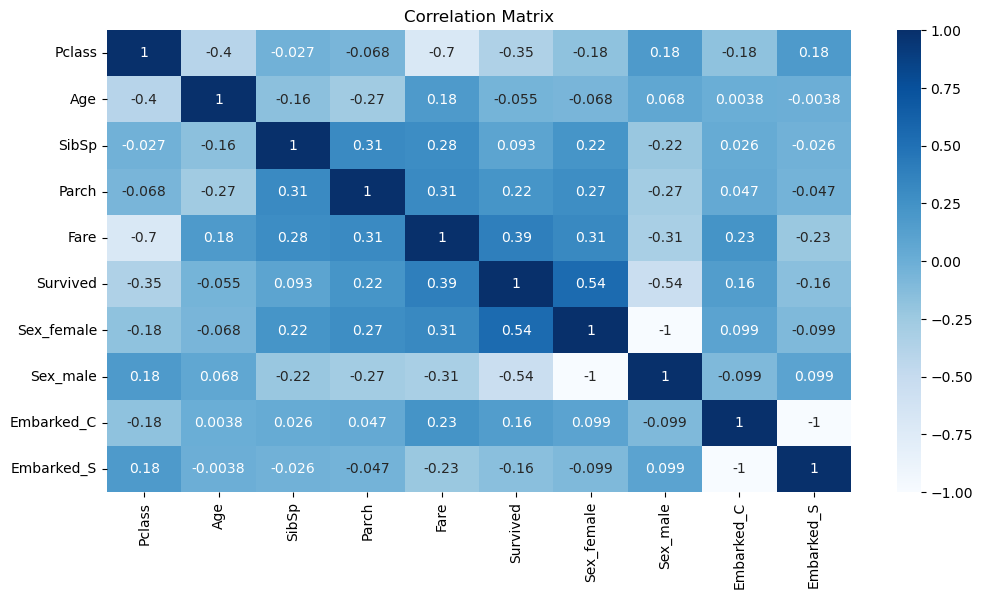

In [62]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Blues', annot=True)
plt.title('Correlation Matrix');

# observation from correlation heatmap

1. The target "Survived" have a strong positive correlation with Sex_female(0.54), and a lower positive correlation with Fare(0.39).



In [64]:
cor['Survived'].sort_values(ascending = False).to_frame()

,Survived
Survived,1.000000
Sex_female,0.544892
Fare,0.391102
Parch,0.222293
Embarked_C,0.155843
SibSp,0.092837
Age,-0.054588
Embarked_S,-0.155843
Pclass,-0.353607
Sex_male,-0.544892


The target have a strong positive correlation with Sex_female variable.

# Visualizing the correlation between label and features using bar plot

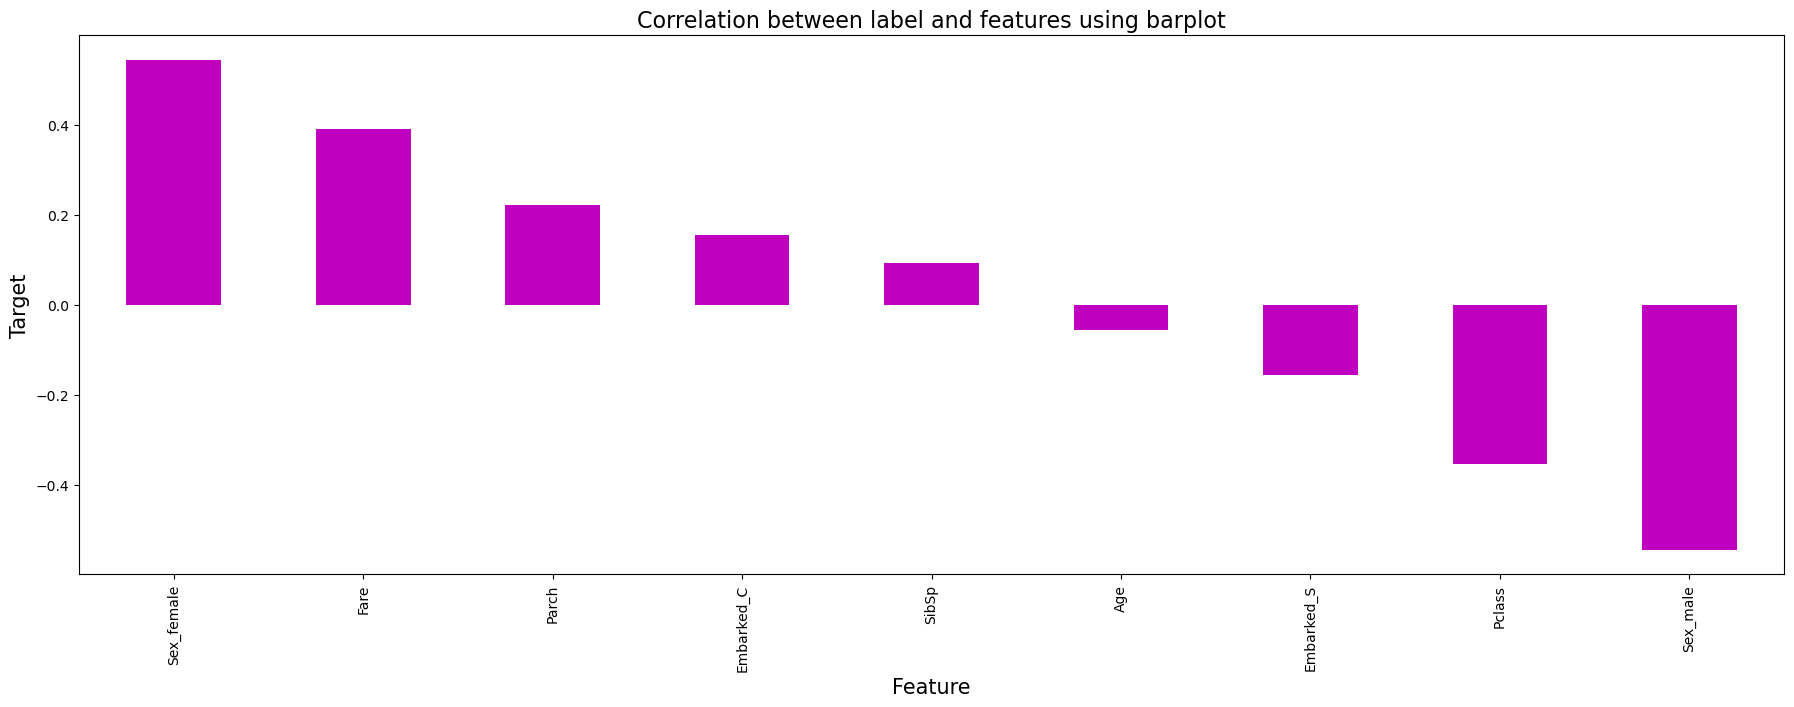

In [67]:
plt.figure(figsize = (22, 7))
cor['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using barplot", fontsize=16)
plt.show()

# Modelling

Separating features and label

In [68]:
x = df_process.drop(['Survived'], axis = 1)
y = df_process['Survived']

# Feature Scaling using Standard Scalarization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_S
0,0.897164,-0.583137,1.027089,-0.475106,-0.783402,-0.702885,0.702885,-0.507046,0.507046
1,-1.489989,0.673685,1.027089,-0.475106,1.485954,1.422707,-1.422707,1.972210,-1.972210
2,0.897164,-0.268932,-0.570841,-0.475106,-0.783402,1.422707,-1.422707,-0.507046,0.507046
3,-1.489989,0.438031,1.027089,-0.475106,1.094265,1.422707,-1.422707,-0.507046,0.507046
4,0.897164,0.438031,-0.570841,-0.475106,-0.694712,-0.702885,0.702885,-0.507046,0.507046
...,...,...,...,...,...,...,...,...,...
748,0.897164,-0.347483,-0.570841,-0.475106,-0.783402,-0.702885,0.702885,-0.507046,0.507046
749,-0.296413,-0.190380,-0.570841,-0.475106,-0.336838,-0.702885,0.702885,-0.507046,0.507046
750,-1.489989,-0.818791,-0.570841,-0.475106,0.433130,1.422707,-1.422707,-0.507046,0.507046
751,0.897164,-0.426034,1.027089,2.948382,0.164863,1.422707,-1.422707,-0.507046,0.507046


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

# Checking Variance Inflation Factor (VIF)

In [69]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

C:\Users\ww\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF values
5,Sex_female,inf
6,Sex_male,inf
7,Embarked_C,inf
8,Embarked_S,inf
4,Fare,2.559355
0,Pclass,2.390189
1,Age,1.353392
3,Parch,1.326197
2,SibSp,1.228293


As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). 

Checking for imbalance

Distribution of target variable: Survived
Survived
0    0.61089
1    0.38911
Name: proportion, dtype: float64


<Axes: xlabel='Survived'>

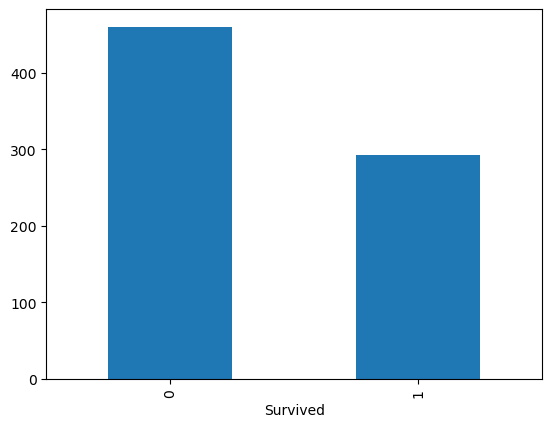

In [70]:
print("Distribution of target variable: Survived")
print(y.value_counts(normalize=True))
y.value_counts().plot(kind='bar')

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

# Oversampling

In [71]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

Distribution of target variable: Survived (After oversampling)
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64


<Axes: xlabel='Survived'>

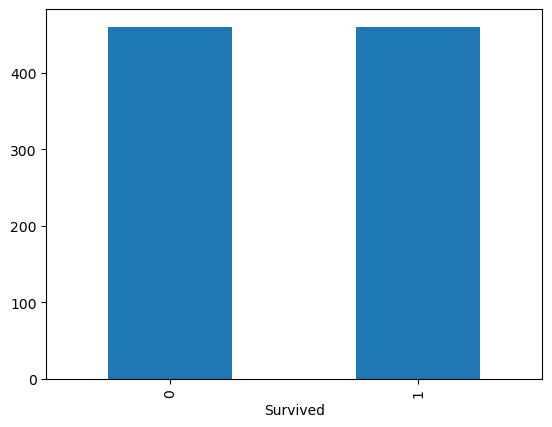

In [72]:
print("Distribution of target variable: Survived (After oversampling)")
print(y1.value_counts(normalize=True))
y1.value_counts().plot(kind='bar')

# Finding the best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [74]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i

    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, x1, y1)
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")
     

Best accuracy is 0.8732 at random_state 176


Creating train test split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (644, 9)
x_test shape:   (276, 9)
y_train shape:  (644,)
y_test shape:   (276,)


In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [77]:
# Functions
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)

    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")

    return [acc, acc_train, y_pred]

In [78]:
models = {'RandomForestClassifier' : RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}


# RandomForestClassifier

In [79]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[119  14]
 [ 18 125]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       133
           1       0.90      0.87      0.89       143

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Training Accuracy using RandomForestClassifier is 96.89%
The accuracy score using RandomForestClassifier is 88.41%


# ExtraTreesClassifier

In [81]:
id_model = 'ExtraTreesClassifier'
model = ExtraTreesClassifier()

# Calculate accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Save the results
model_metrics = {'id': id_model, 'Model': model, 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)


y_pred = {}
y_pred[id_model] = pred

# Display the DataFrame with model metrics
print(df_model_accuracy)


Model: ExtraTreesClassifier
Confusion matrix: 
 [[116  17]
 [ 23 120]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       133
           1       0.88      0.84      0.86       143

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Training Accuracy using ExtraTreesClassifier is 96.89%
The accuracy score using ExtraTreesClassifier is 85.51%
                     id                                              Model  \
0  ExtraTreesClassifier  (ExtraTreeClassifier(random_state=1781887567),...   

   Training Accuracy  Model Accuracy Score  
0           0.968944              0.855072  


# LogisticRegression

In [82]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[115  18]
 [ 27 116]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       133
           1       0.87      0.81      0.84       143

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Training Accuracy using LogisticRegression is 78.73%
The accuracy score using LogisticRegression is 83.7%


C:\Users\ww\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [83]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[122  11]
 [ 56  87]]
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.92      0.78       133
           1       0.89      0.61      0.72       143

    accuracy                           0.76       276
   macro avg       0.79      0.76      0.75       276
weighted avg       0.79      0.76      0.75       276

Training Accuracy using SVC is 72.20%
The accuracy score using SVC is 75.72%


# GradientBoostingClassifier

In [84]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[118  15]
 [ 21 122]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       133
           1       0.89      0.85      0.87       143

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Training Accuracy using GradientBoostingClassifier is 89.29%
The accuracy score using GradientBoostingClassifier is 86.96%


In [85]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[112  21]
 [ 21 122]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.85      0.85      0.85       143

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

Training Accuracy using AdaBoostClassifier is 82.30%
The accuracy score using AdaBoostClassifier is 84.78%


In [86]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[119  14]
 [ 28 115]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.89      0.80      0.85       143

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

Training Accuracy using BaggingClassifier is 95.50%
The accuracy score using BaggingClassifier is 84.78%


the best models is using randomforestclassifier which gives accuraccy of 88.41%

# Hyperparameter tuning

Finding the best parameters

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [89]:
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space with valid options
param_grid = {
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2'],  # Correct values for max_features
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 100],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

# Build the RandomForestClassifier model
model = RandomForestClassifier()

# Perform search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=multiprocessing.cpu_count() - 1)
grid_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 300}
Best score:  0.8137112403100776


In [90]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [91]:
print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

These are the best parameters for training the model.

In [92]:
best_model

RandomForestClassifier(max_depth=80, max_features='log2', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=300)

In [93]:
print(f"Best random state: {random_state}")

Best random state: 176


In [95]:
best_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=80,
                                    max_features=3, min_samples_leaf=3,
                                    min_samples_split=12, n_jobs=-1, n_estimators=100, random_state=random_state)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 88.41%


In [94]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

# Plotting ROC and compare AUC for all the models used

In [99]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection

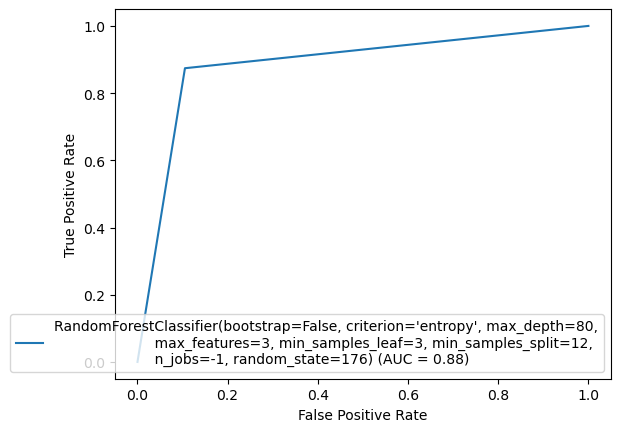

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = best_model)
display.plot()

In [100]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Titanic_survived_data.pkl")

['Titanic_survived_data.pkl']

In [101]:
# Lets load the saved model and get the predictions
model = joblib.load("Titanic_survived_data.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {round(accuracy_score(y_test, prediction),4)}")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 0.8841


,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
Predicted,1,0,1,1,1,0,1,1,1,0,...,1,0,0,0,0,0,0,1,1,1
Original,1,0,1,1,1,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,1


These are the predicted values in a dataset to compared the prediction with the test data.

overview:-
In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.

i would be glad if you will provide feedback its help for further improvements in my learning

----------------------------------------------Thanks-------------------------------------------------------------